In [1]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt

In [2]:
station = pd.read_excel('중구_지하철역정보.xlsx')
station.head()

,지하철역,주소,위도,경도,개수,가게수,특이사항
0,서울역,서울특별시 중구 한강대로,37.555127,126.970550,6,NaN,NaN
1,동대문역사문화공원,서울특별시 중구 을지로7가,37.565383,127.008847,3,NaN,NaN
2,충무로,서울특별시 중구 필동2가,37.561093,126.993700,2,NaN,NaN
3,을지로3가,서울특별시 중구 을지로3가,37.566175,126.991924,2,NaN,NaN
4,신당,서울특별시 중구 황학동 퇴계로,37.565500,127.018853,2,NaN,NaN


In [6]:
store = pd.read_csv('상가업소_중구_02.csv')
store.head()

,상호명,상권업종중분류명,위도,경도
0,피자마루,패스트푸드,37.552153,127.010861
1,황생칼국수,분식,37.559810,126.983052
2,피자,패스트푸드,37.549451,127.007762
3,샘,음식배달서비스,37.565539,127.002874
4,현대,분식,37.562901,126.976864


In [9]:
# 위도, 경도 좌표로 거리 구하는 함수
# latitude : 위도, 가로선 / longitude : 경도, 세로선

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    
    지구의 두점 사이의 거리를 계산
    """
    # convert decimal degrees to radians  # 10진수를 radian 으로 변환
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula  공식
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c2 = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles 킬로미터단위의 지구반경
    return c2 * r
    #return 1;

lat1 = station["위도"][0]
lon1 = station["경도"][0]

In [8]:
station['위도'][0], station['경도'][0]

(37.555127, 126.97055)

In [10]:
from tqdm import tqdm_notebook
from time import sleep

In [30]:
# 200m 반경내 가게수

i = 0 
cnt = 0
radius = 0.2 # in kilometer

station_set = tqdm_notebook(station.values) # 진행률 확인?
station_index = 0;

for i in station_set:
    
    store_count = 0
    lat1 = station["위도"][station_index]
    lon1 = station["경도"][station_index]
    
    loop = store.values
    store_index = 0
    
    for char in loop :
        lat2 = store.values[store_index][2]
        lon2 = store.values[store_index][3]
        store_index += 1
        
        check = haversine(lon1, lat1, lon2, lat2)

        if check <= radius:
            store_count += 1
        
    station.가게수.values[station_index] = store_count
    station_index += 1
    

In [31]:
station

,지하철역,주소,위도,경도,개수,가게수,특이사항
0,서울역,서울특별시 중구 한강대로,37.555127,126.970550,6,9.0,NaN
1,동대문역사문화공원,서울특별시 중구 을지로7가,37.565383,127.008847,3,5.0,NaN
2,충무로,서울특별시 중구 필동2가,37.561093,126.993700,2,24.0,NaN
3,을지로3가,서울특별시 중구 을지로3가,37.566175,126.991924,2,20.0,NaN
4,신당,서울특별시 중구 황학동 퇴계로,37.565500,127.018853,2,31.0,NaN
5,약수,서울특별시 중구 신당동,37.554548,127.010639,2,52.0,NaN
6,을지로4가,서울특별시 중구 을지로동 82,37.566934,126.997873,2,4.0,NaN
7,시청,서울특별시 중구 정동,37.565511,126.976795,2,11.0,NaN
8,동대입구,서울특별시 중구 장충동2가,37.558942,127.005541,1,3.0,NaN
9,버티고개,서울특별시 중구 신당2동,37.548028,127.006758,1,12.0,아파트단지


In [32]:
station.to_excel('가게수.xlsx')

In [28]:
# 300m 내 가게수 
i = 0 
cnt = 0
radius = 0.3 # in kilometer

station_set = tqdm_notebook(station.values) # 진행률 확인?
station_index = 0;

for i in station_set:
    
    store_count = 0
    lat1 = station["위도"][station_index]
    lon1 = station["경도"][station_index]
    
    loop = store.values
    store_index = 0
    
    for char in loop :
        lat2 = store.values[store_index][2]
        lon2 = store.values[store_index][3]
        store_index += 1
        
        check = haversine(lon1, lat1, lon2, lat2)

        if check <= radius:
            store_count += 1
        
    station.가게수.values[station_index] = store_count
    station_index += 1
    

In [ ]:
# 거리 이게 300m 맞나 확인하는거 만들어서 해보자
for char in loop :
    lat2 = store.values[store_index][2]
    lon2 = store.values[store_index][3]
    store_index += 1

    check = haversine(lon1, lat1, lon2, lat2)

    if check <= radius:
        store_count += 1

station.가게수.values[station_index] = store_count
station_index += 1


In [34]:
import matplotlib.pyplot as plt #matplotlib중 pyplot이 그래프를 그리는 모듈
import seaborn as sns
%matplotlib inline 
#그래프 결과를 출력 세션에 나오게 하는 설정
import platform
path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [40]:
station

,지하철역,주소,위도,경도,개수,가게수,특이사항
0,서울역,서울특별시 중구 한강대로,37.555127,126.970550,6,9.0,NaN
1,동대문역사문화공원,서울특별시 중구 을지로7가,37.565383,127.008847,3,5.0,NaN
2,충무로,서울특별시 중구 필동2가,37.561093,126.993700,2,24.0,NaN
3,을지로3가,서울특별시 중구 을지로3가,37.566175,126.991924,2,20.0,NaN
4,신당,서울특별시 중구 황학동 퇴계로,37.565500,127.018853,2,31.0,NaN
5,약수,서울특별시 중구 신당동,37.554548,127.010639,2,52.0,NaN
6,을지로4가,서울특별시 중구 을지로동 82,37.566934,126.997873,2,4.0,NaN
7,시청,서울특별시 중구 정동,37.565511,126.976795,2,11.0,NaN
8,동대입구,서울특별시 중구 장충동2가,37.558942,127.005541,1,3.0,NaN
9,버티고개,서울특별시 중구 신당2동,37.548028,127.006758,1,12.0,아파트단지


In [42]:
test = station.set_index('지하철역')
test.head()

,주소,위도,경도,개수,가게수,특이사항
지하철역,,,,,,
서울역,서울특별시 중구 한강대로,37.555127,126.970550,6,9.0,NaN
동대문역사문화공원,서울특별시 중구 을지로7가,37.565383,127.008847,3,5.0,NaN
충무로,서울특별시 중구 필동2가,37.561093,126.993700,2,24.0,NaN
을지로3가,서울특별시 중구 을지로3가,37.566175,126.991924,2,20.0,NaN
신당,서울특별시 중구 황학동 퇴계로,37.565500,127.018853,2,31.0,NaN


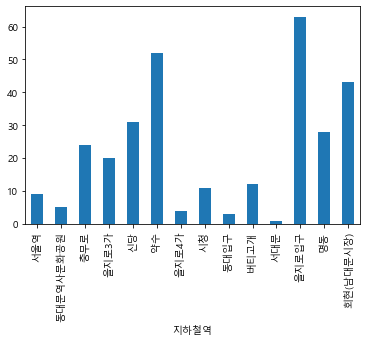

In [44]:
test['가게수'].plot(kind='bar')